In [1]:
import utide

print(utide.__version__)

0.3.0


In [2]:
import numpy as np


def fake_tide(t, M2amp, M2phase):
    """
    Generate a minimally realistic-looking fake semidiurnal tide.
    
    t is time in hours
    phases are in radians
    
    Modified from: http://currents.soest.hawaii.edu/ocn760_4/_static/plotting.html
    """
    return M2amp * np.sin(2 * np.pi * t / 12.42 - M2phase)

In [18]:
from pandas import date_range

N = 500

t = date_range(start="2016-03-29", periods=N, freq="H")

# Signal + some noise.
u = fake_tide(np.arange(N), M2amp=2, M2phase=0) + np.random.randn(N)
v = fake_tide(np.arange(N), M2amp=1, M2phase=np.pi)  + np.random.randn(N)

In [19]:
u

array([2.1       , 3.06917675, 3.79555981, 4.09717907, 3.89847425,
       3.24922397, 2.31207541, 1.3217987 , 0.52647339, 0.12534069,
       0.21889052, 0.78368721, 1.67824049, 2.67845102, 3.53375068,
       4.02987373, 4.04253374, 3.56855917, 2.72668794, 1.72782174,
       0.82219192, 0.23667268, 0.11794559, 0.49575361, 1.27545003,
       2.2617089 , 3.2074572 , 3.87577044, 4.09922587, 3.82184447,
       3.11311456, 2.15058386, 1.17538113, 0.43180964, 0.1061455 ,
       0.27997258, 0.90974451, 1.83769376, 2.83135475, 3.64180012,
       4.06600086, 3.99768814, 3.45397536, 2.57107092, 1.57015597,
       0.70197511, 0.18402098, 0.14604906, 0.5975719 , 1.4254761 ,
       2.4223589 , 3.33848584, 3.94435303, 4.08818142, 3.73393979,
       2.9703711 , 1.98876108, 1.03501811, 0.34806948, 0.1000064 ,
       0.35297247, 1.04359581, 1.99886464, 2.97946944, 3.73975362,
       4.08925429, 3.94041617, 3.3305255 , 2.41236926, 1.41595971,
       0.59091278, 0.14391541, 0.18694731, 0.70922834, 1.57991

In [20]:
from utide import solve


coef = solve(
    t, u, v,
    lat=-42.5,
    nodal=False,
    trend=False,
    method='ols',
    conf_int='linear',
    Rayleigh_min=0.95,
)

solve: matrix prep ... solution ... done.


In [21]:
from utide import reconstruct

tide = reconstruct(t, coef)

prep/calcs ... done.


In [ ]:
tide.keys()

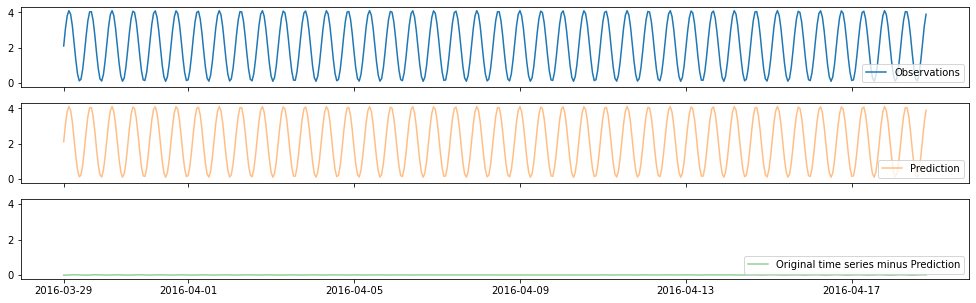

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, u, label='Observations', color='C0')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['u'], alpha=0.5, label='Prediction', color='C1')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, u-tide['u'], alpha=0.5, label='Original time series minus Prediction', color='C2')
ax2.legend(numpoints=1, loc='lower right');

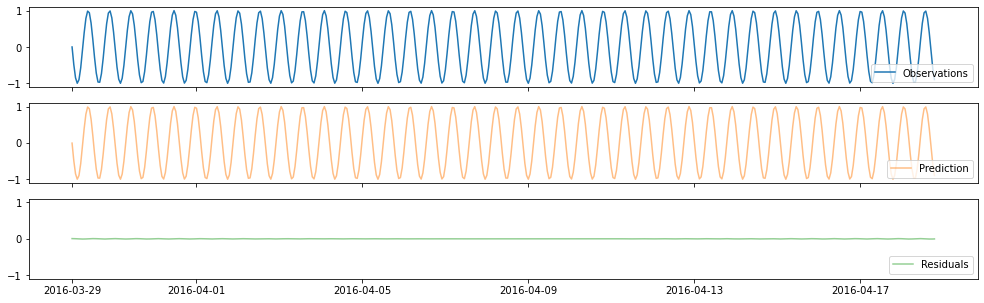

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, v, label='Observations', color='C0')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['v'], alpha=0.5, label='Prediction', color='C1')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, v-tide['v'], alpha=0.5, label='Residuals', color='C2')
ax2.legend(numpoints=1, loc='lower right');